Importing needed libraries and files.

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mnist_loader
import network

Loading validation data and making a list of it.

In [13]:
_, validation_data, _ = mnist_loader.load_data_wrapper()
validation_data = list(validation_data)

Choosing randomly 10pcs of images from the validation data.

In [19]:
random_indices = np.random.choice(len(validation_data), size=10, replace=False)
random_samples = [(i, image, true_label) for i, (image, true_label) in enumerate(validation_data) if i in random_indices]

Plotting randomly chosen 10pcs images as well as their true labels and indecies. 

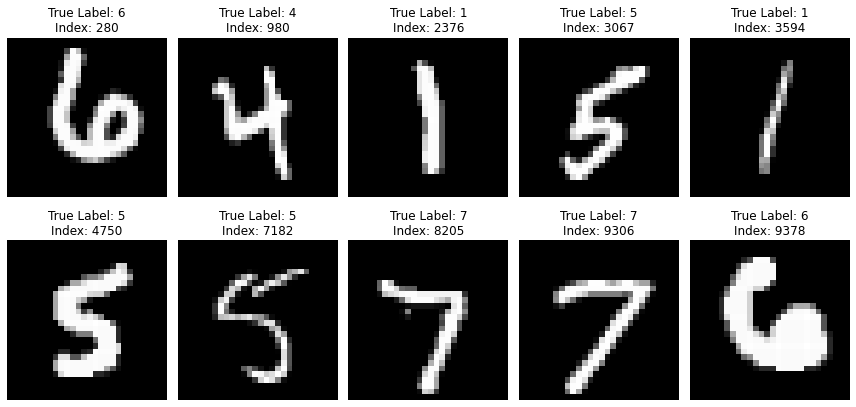

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  

for i, (index, image, true_label) in enumerate(random_samples):
    if i < 10:
        ax = axes[i // 5, i % 5]
        ax.imshow(image.reshape(28, 28), cmap='gray')

        if isinstance(true_label, np.ndarray):
            ax.set_title(f'True Label: {true_label[0]}\nIndex: {index}')
        else:
            ax.set_title(f'True Label: {true_label}\nIndex: {index}')

        ax.axis('off')

plt.tight_layout() 
plt.show()

User can choose a digit to be predicted by the neural network model, by selecting the corresponding image index.

In [21]:
selected_index = int(input("Type the index of the image you would like to predict: "))

Setting neural network's number of neurons in input layer to 784, due to 784 pixels per picture. Hidden layer 30pcs of neurons. Output layer set to 10neurons, due to number of digits (0-9). 

Training neural network with 30 epochs, mini-batch size 10, and learning rate 3.0.

In [22]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)


Epoch 0 : 9093 / 10000
Epoch 1 : 9187 / 10000
Epoch 2 : 9333 / 10000
Epoch 3 : 9327 / 10000
Epoch 4 : 9329 / 10000
Epoch 5 : 9360 / 10000
Epoch 6 : 9390 / 10000
Epoch 7 : 9361 / 10000
Epoch 8 : 9399 / 10000
Epoch 9 : 9380 / 10000
Epoch 10 : 9383 / 10000
Epoch 11 : 9398 / 10000
Epoch 12 : 9417 / 10000
Epoch 13 : 9432 / 10000
Epoch 14 : 9406 / 10000
Epoch 15 : 9437 / 10000
Epoch 16 : 9434 / 10000
Epoch 17 : 9453 / 10000
Epoch 18 : 9440 / 10000
Epoch 19 : 9455 / 10000
Epoch 20 : 9449 / 10000
Epoch 21 : 9450 / 10000
Epoch 22 : 9429 / 10000
Epoch 23 : 9441 / 10000
Epoch 24 : 9435 / 10000
Epoch 25 : 9438 / 10000
Epoch 26 : 9456 / 10000
Epoch 27 : 9434 / 10000
Epoch 28 : 9462 / 10000
Epoch 29 : 9443 / 10000


Saving and loading the trained model.

In [23]:
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(net, f)

with open('trained_model.pkl', 'rb') as f:
    loaded_net = pickle.load(f)


Fetching user selected image and its true label.

In [24]:
validation_data_list = list(validation_data)
selected_sample = validation_data_list[selected_index]

selected_image_data = selected_sample[0]
true_label = selected_sample[1]

Compatibilizing the user selected image and feeding it to the trained neural network.

In [25]:
input_data = np.reshape(selected_image_data, (784, 1))
predicted_output = loaded_net.feedforward(input_data)

Display selected image and its true label. Printing the predicted digit by the model.

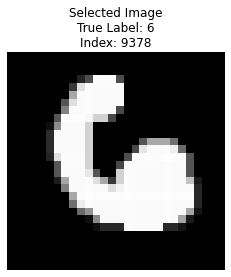

Predicted Output: 6


In [26]:
plt.figure()
plt.imshow(selected_image_data.reshape(28, 28), cmap='gray')
plt.title(f'Selected Image\nTrue Label: {true_label}\nIndex: {selected_index}')
plt.axis('off')
plt.show()

print(f"Predicted Output: {np.argmax(predicted_output)}")